# PRAKTIKUM MINGGU KE 4

## praktik 1 Transformasi Kurva (Negatif)

Transformasi kurva digunakan untuk menghasilkan gambar dengan tone warna yang terbalik dari gambar asli. Jadi area yang awalnya terang akan menjadi gelap, dan area yang gelap akan menjadi terang. 

konsep transformasi negatif ini dengan cara melakukan pembalikan nilai intensitas, misal piksel dengan nilai 255 akan menjadi 0 begitu sebaliknya. Tujuannya adalah untuk mencari detail dalam pengamatan suatu gambar misal dalam foto rontgen

### Kode program

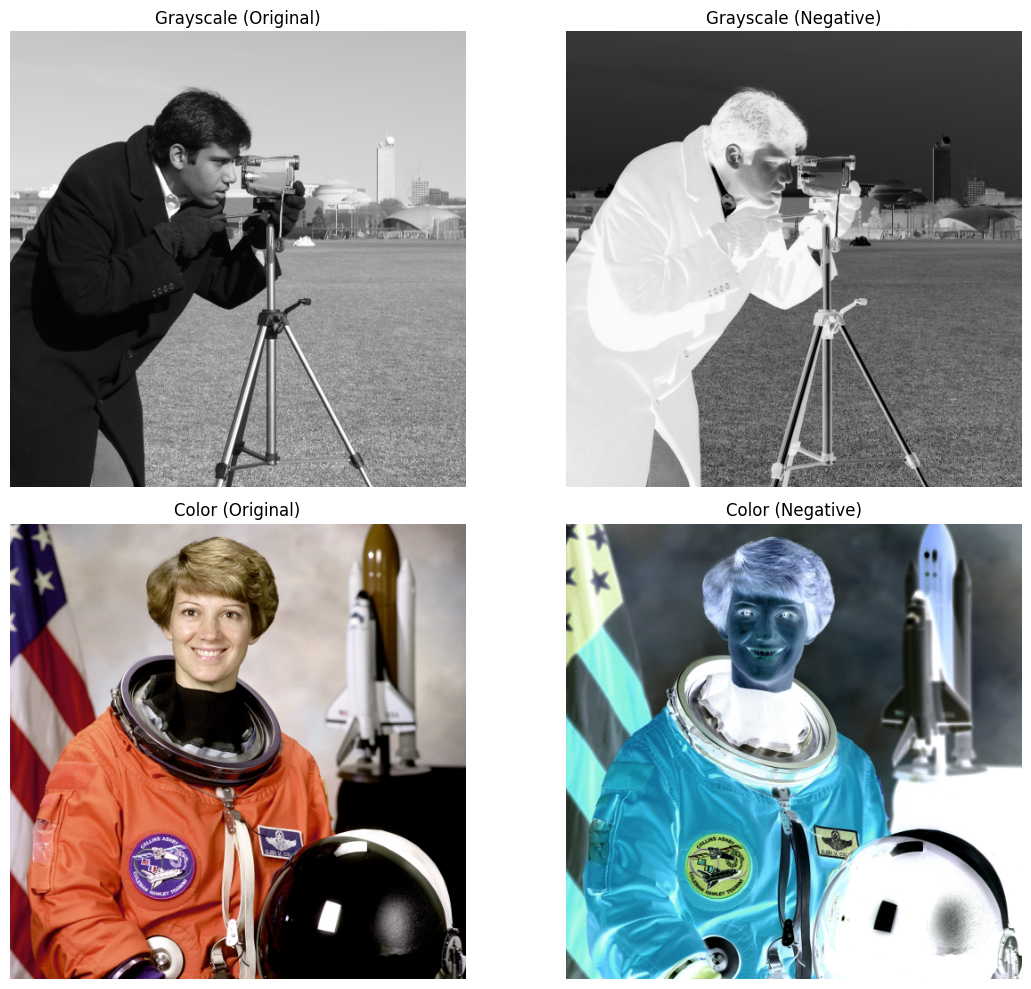

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float

#1. percobaan transformasi dengan gambar grayscale
img_gray_8bit = data.camera()
img_gray_float=img_as_float(img_gray_8bit)

negative_gray = 1.0 - img_gray_float #invers intesitas output = 1 - input

#2. percobaan transformasi dengan gambar berwarna
img_color_8bit = data.astronaut()
img_color_float=img_as_float(img_color_8bit)

negative_color = 1.0 - img_color_float #invers intesitas output = 1 - input

#3. Plotting visualisasi hasil
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
titles = ["Grayscale (Original)", "Grayscale (Negative)",
          "Color (Original)", "Color (Negative)"]
images = [img_gray_float, negative_gray,img_color_float, negative_color]
cmaps = ['gray', 'gray', None, None]

for ax, img, title, cmap in zip(axes.ravel(), images, titles, cmaps):
    ax.imshow(img, cmap=cmap)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()




## Praktik 2 Histogram dan Ekualisasi Histogram

**Ekualisasi Histogram** secara sederhana itu digunakan untuk "meratakan" intensitas cahaya agar lebih balance di seluruh rentang intensitasnya. jadi pada area yang gelap bisa menjadi lebih terang, dan area yang terang bisa menjadi sedikit lebih gelap. kalau untuk **histogram** sendiri itu persebaran intensitasnya.

- histogram gambar *grayscale* memiliki sebaran intensitas cahaya menggunakan float (0.1) pada sumbu x dan y
- histogram gambar *RGB* terdiri dari 3 channel yaitu R, G, B. setiap channel punya histogram sendiri yang akan di overlay atau ditumpuk, sehingga bisa terlihat dominasi antar warnanya


### gambar grayscale

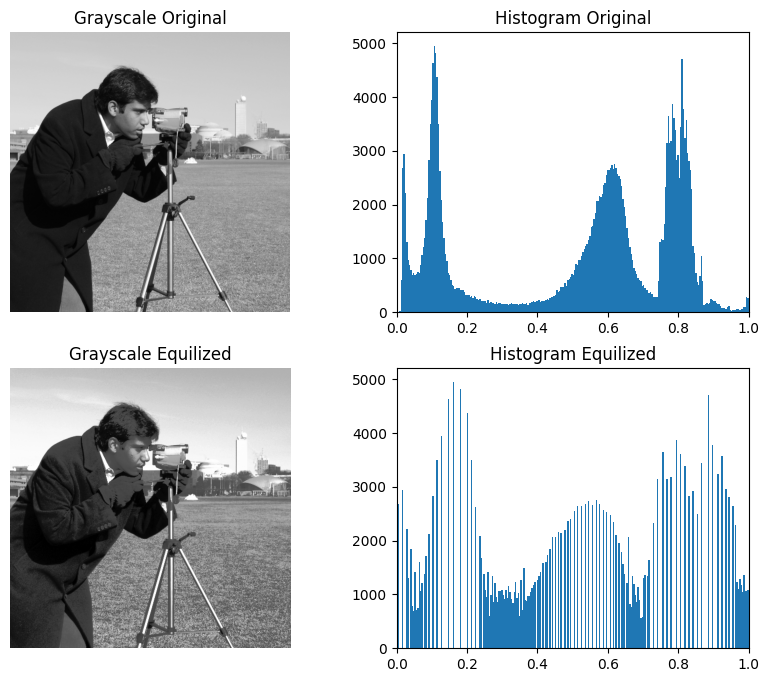

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float, exposure


#1. histogram & ekualisasi gambar grayscale
# import gambar graysclae
img_gray_8bit = data.camera()
img_gray_float=img_as_float(img_gray_8bit)

# menghitung histogram gambar asli
hist_gray, bins_gray = np.histogram(img_gray_float.ravel(), bins=256, range=(0,1))

#ekualisasi histogram
img_gray_eq = exposure.equalize_hist(img_gray_float)
hist_gray, bins_gray = np.histogram(img_gray_eq.ravel(), bins=256, range=(0,1))

# plotting visualisasi gambar grayscale
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

data = [
    ('img', img_gray_float, "Grayscale Original"),
    ('hist', img_gray_float.ravel(), "Histogram Original"),
    ('img', img_gray_eq, "Grayscale Equilized"),
    ('hist', img_gray_eq.ravel(), "Histogram Equilized")
]

for ax, (tipe, content, title) in zip(axes.ravel(), data):
    if tipe == 'img':
        ax.imshow(content, cmap='gray')
        ax.axis('off')
    else:
        ax.hist(content, bins=256, range=(0, 1))
        ax.set_xlim(0, 1)
    
    ax.set_title(title)



### gambar warna

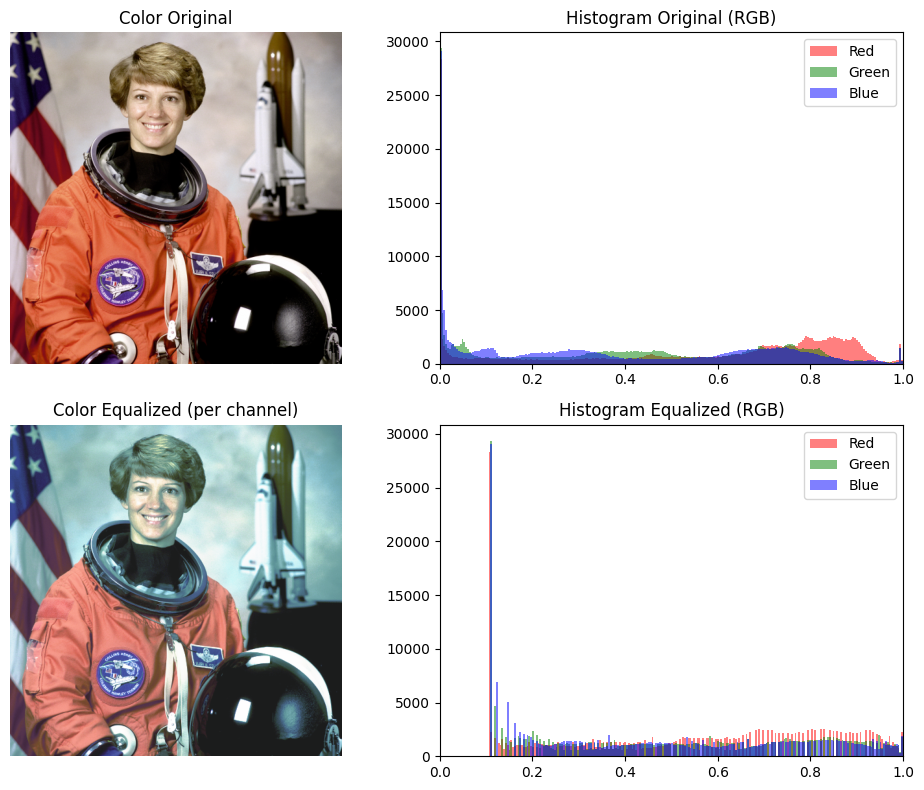

In [44]:
#2. histogram & ekualisasi gambar warna
#import gambar

img_color_float=img_as_float(img_color_8bit)

#histogram per warna
red_channel = img_color_float[:, :, 0]
green_channel = img_color_float[:, :, 1]
blue_channel = img_color_float[:, :, 2]

hist_r, bins_r = np.histogram(red_channel.ravel(), bins=256, range=(0,1))
hist_g, bins_g = np.histogram(green_channel.ravel(), bins=256, range=(0,1))
hist_b, bins_b = np.histogram(blue_channel.ravel(), bins=256, range=(0,1))

#ekualisasi histogram tiap warna
#note: disarankan untuk melakukan equilizer di channel luminance (Y) atai value (HSV)
#ini sebagai contoh saja menggunakan contoh per channel
r_eq = exposure.equalize_hist(red_channel)
g_eq = exposure.equalize_hist(green_channel)
b_eq = exposure.equalize_hist(blue_channel)

#gabungkan menjadi gambar yang sudah di ekualisasi
img_color_eq = np.dstack((r_eq, g_eq, b_eq))

#plotting visualisasi
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
ax = axes.ravel()

images = [img_color_float, img_color_eq]
titles_img = ["Color Original", "Color Equalized (per channel)"]

# Plot gambar asli dan ekualisasi
for i in range(2):
    ax[i*2].imshow(images[i])
    ax[i*2].set_title(titles_img[i])
    ax[i*2].axis('off')

# Data histogram
rgb_data = [(red_channel, green_channel, blue_channel), (r_eq, g_eq, b_eq)]
titles_hist = ["Histogram Original (RGB)", "Histogram Equalized (RGB)"]

for i in range(2):
    r, g, b = rgb_data[i]
    ax[i*2+1].hist(r.ravel(), bins=256, range=(0,1), color='red', alpha=0.5, label='Red')
    ax[i*2+1].hist(g.ravel(), bins=256, range=(0,1), color='green', alpha=0.5, label='Green')
    ax[i*2+1].hist(b.ravel(), bins=256, range=(0,1), color='blue', alpha=0.5, label='Blue')
    ax[i*2+1].set_title(titles_hist[i])
    ax[i*2+1].set_xlim(0, 1)
    ax[i*2+1].legend(loc='upper right')

plt.tight_layout()
plt.show()




## Praktik 3 Konvolusi (Filter Rata-Rata) 

sederhananya konvolusi ini digunakan untuk melakukan proses smoothing atau menghaluskan gambar atau bisa dibilang untuk melakukan bluring. 

konsep filter rata rata adalah kernel rata rata menghitung nilai pixel output sebagai rata rata tetangga pixel sekitarnya, apabila terjadi perbedaan nilai yang ekstrem maka akan dihaluskan 

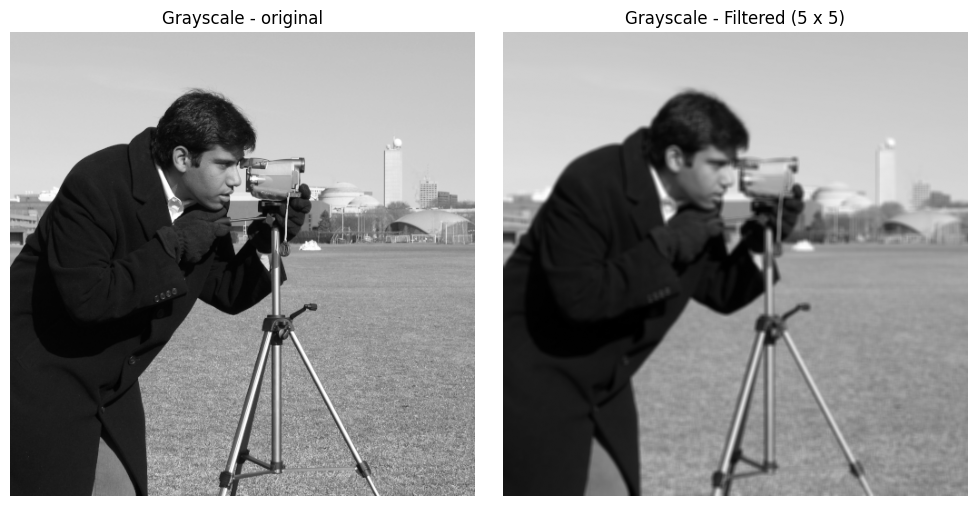

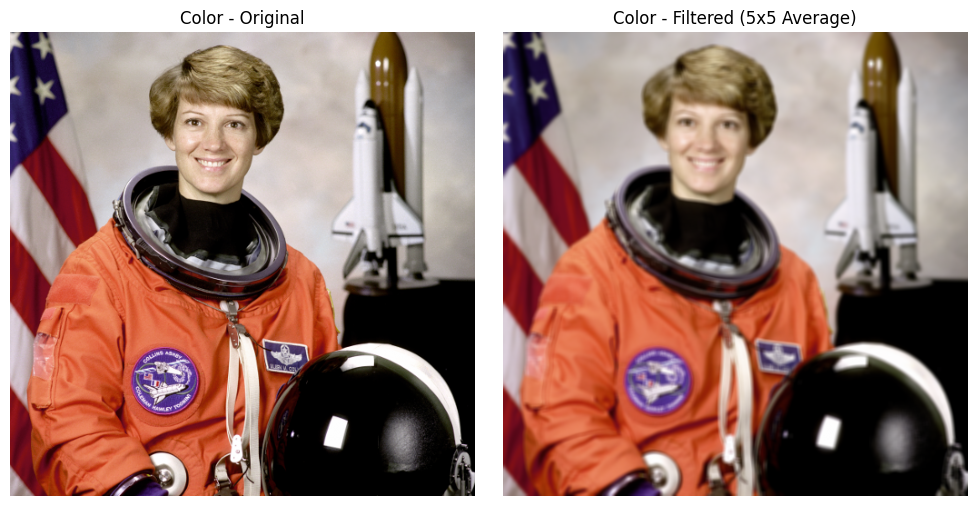

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from scipy import ndimage as ndi

#1. Konvulusi pada gambar grayscale
#import gambar
gray_8bit = data.camera()
gray_image = img_as_float(gray_8bit)

#definisi jumlah kernel
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), dtype=float) / (kernel_size ** 2)

#proses konvolusi
gray_filtered = ndi.convolve(gray_image, kernel, mode='reflect')

#visualisasi
fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title('Grayscale - original')
axes[0].axis('off')

axes[1].imshow(gray_filtered, cmap='gray')
axes[1].set_title(f'Grayscale - Filtered ({kernel_size} x {kernel_size})')
axes[1].axis('off')
plt.tight_layout()
plt.show()

#2. Konvulusi pada gambar berwarna
#import gambar
color_8bit = data.astronaut()
color_image = img_as_float(color_8bit)

#menerapkan filter di tiap channel
color_filtered = np.zeros_like(color_image)

for c in range(3):  # c = 0 (Red), 1 (Green), 2 (Blue)
    channel_original = color_image[:, :, c]
    channel_filtered = ndi.convolve(channel_original, kernel, mode='reflect')
    color_filtered[:, :, c] = channel_filtered

# C. Tampilkan hasil
fig2, axes2 = plt.subplots(1, 2, figsize=(10, 5))
axes2[0].imshow(color_image)
axes2[0].set_title("Color - Original")
axes2[0].axis('off')

axes2[1].imshow(color_filtered)
axes2[1].set_title(f"Color - Filtered ({kernel_size}x{kernel_size} Average)")
axes2[1].axis('off')

plt.tight_layout()
plt.show()








## Praktik 4 Filter Median (Mengatasi Noise)

Filter median digunakan untuk menghilangkan piksel hitam dan putih acak yang mengganggu, misalnya ada titik putih diwarna yang gelap,begitu sebaliknya.

konsep dari filter median ini tidak mengeblurkan gambar secara signifikan, karena gambar yang dihasilkan masih terlihat jelas setelah melalui proses median filtering

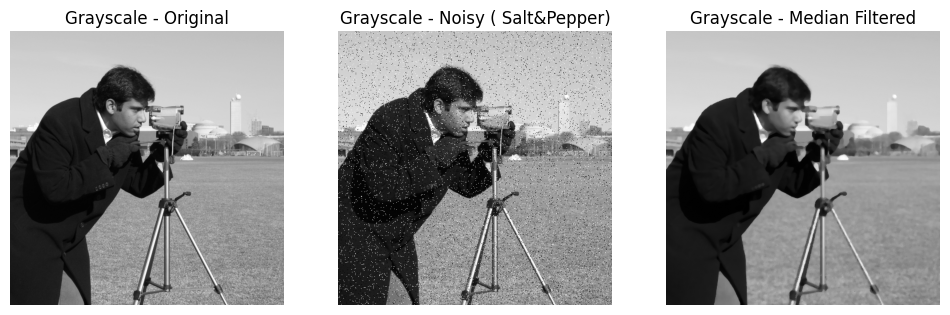

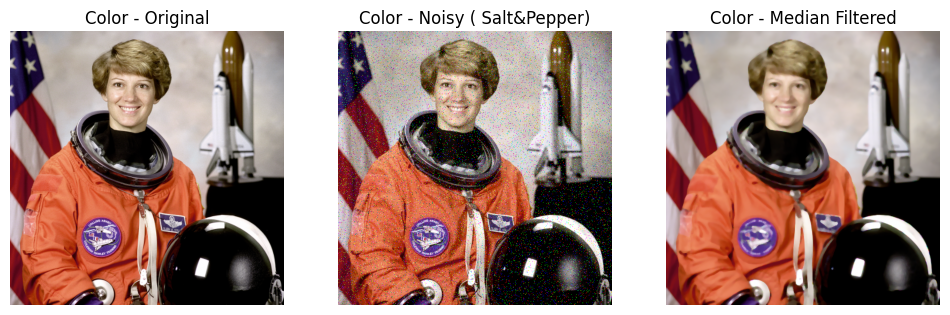

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float, util, filters, morphology

#1. filtering pada gambar grayscale
#import gambar
gray_8bit = data.camera()
gray_image = img_as_float(gray_8bit)

#menambahkan noise pada gambar
gray_noise = util.random_noise(gray_image, mode='s&p', amount=0.05)
#amount 0.05 brarti yang terpengaruh noise adalah 5%

#mengatasi dengan filter median
#menggunakan structuring element berbentuk disk 3 radius
disk3 = morphology.disk(3)
gray_denoised = filters.median(gray_noise, disk3)

#visualisasi
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

#list data
images = [gray_image, gray_noise, gray_denoised]
titles = ['Grayscale - Original', 'Grayscale - Noisy ( Salt&Pepper)', 
          'Grayscale - Median Filtered']

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

#2. Filtering pada gambar berwarna
#import gambar
color_8bit = data.astronaut()
color_image = img_as_float(color_8bit)

#menambahkan noise pada gambar
color_noise = util.random_noise(color_image, mode='s&p', amount=0.05)

#menerapkan filter median
#fungsi median dapat menangani array 3d (rgb)
color_denoised = np.zeros_like(color_noise)
for c in range(color_noise.shape[2]):
    color_denoised[:, :, c] = filters.median(color_noise[:, :, c], disk3)

#visualisasi
fig2, axes2 = plt.subplots(1, 3, figsize=(12, 4))

#list data
images = [color_image, color_noise, color_denoised]
titles = ['Color - Original', 'Color - Noisy ( Salt&Pepper)', 'Color - Median Filtered']

for ax, img, title in zip(axes2, images, titles):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off')


## Penugasan 1: Transformasi kurva logaritmik dan tranformasi gamma

1. **Transformasi logaritmik**
Transformasi ini dipengaruhi oleh parameter konstanta **c** (gain) yang fungsinya untuk menaikkan semua nilai logaritma dan intensitas piksel. semakin besar nilai gain, maka gambar akan semakin terang, sebaliknya semakin kecil nilai gain, maka gambar akan semakin gelap. ini
efektif digunakan untuk menonjolkan detail pada area gelap dari gambar, karena nilai intensitas rendah akan ditingkatkan lebih signifikan dibandingkan nilai tinggi.

2. **Transformasi Gamma**
- *dengan γ < 1*
Ketika nilai gamma (γ) kurang dari 1, transformasi ini akan meningkatkan intensitas piksel rendah, sehingga gambar menjadi lebih terang. 

- *dengan γ > 1*
Sebaliknya, jika nilai gamma lebih dari 1, transformasi akan menurunkan intensitas piksel rendah, menjadikan gambar terlihat lebih gelap.




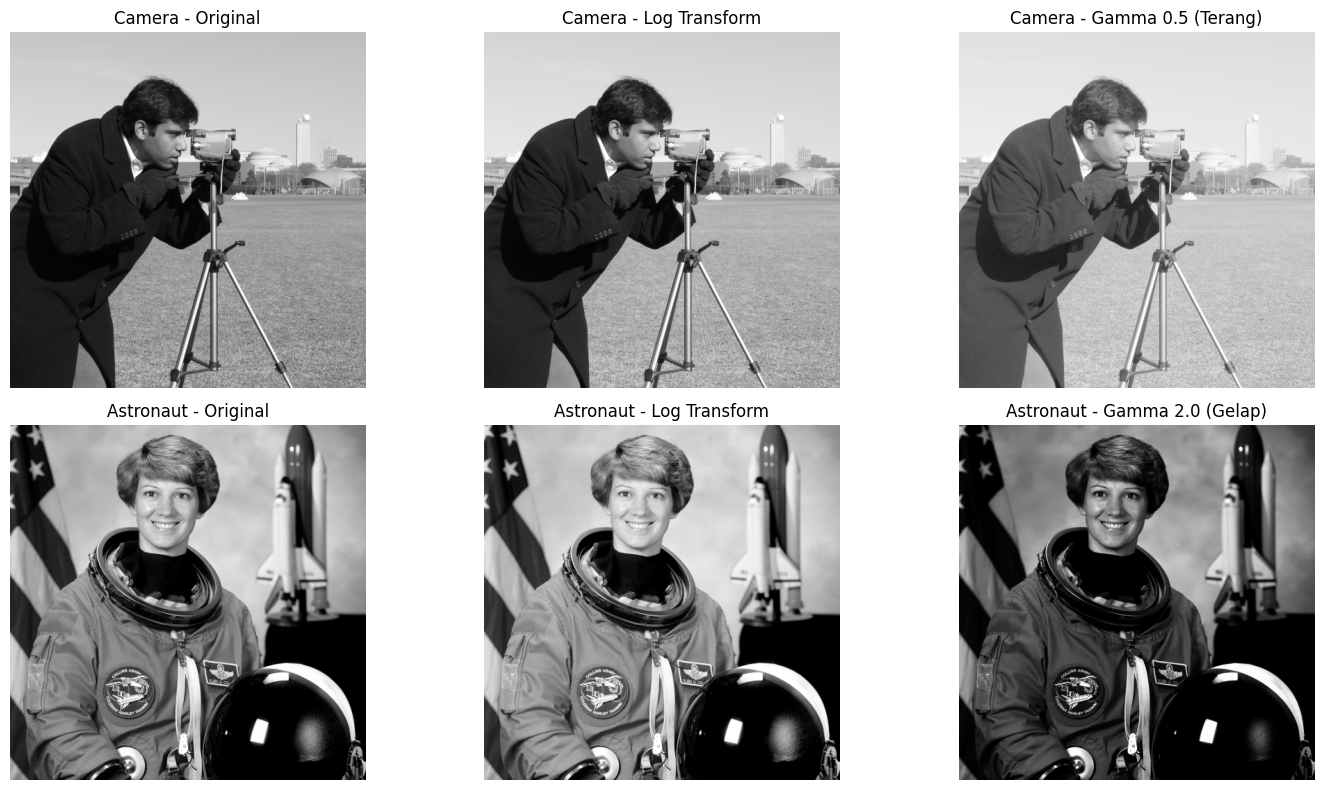

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float, color, exposure

#1. Import gambar
# gambar camera
img_gray_8bit = data.camera()
img_gray_cam = img_as_float(img_gray_8bit)

#gambar astronaut
img_color_8bit = data.astronaut()
img_gray_astro = color.rgb2gray(img_as_float(img_color_8bit))


#2. Transformasi
# Transformasi logaritmik
log_camera = exposure.adjust_log(img_gray_cam, gain=1.0)
log_astronaut = exposure.adjust_log(img_gray_astro, gain=1.0)


# Transformasi gamma
gamma_camera = exposure.adjust_gamma(img_gray_cam, gamma=0.5, gain=1.0) # gamma < 1 menjadi terang
gamma_astronaut = exposure.adjust_gamma(img_gray_astro, gamma=2.0, gain=1.0) # gamma < 1 menjadi gelap

# List data untuk visualisasi
images = [
    (img_gray_cam, "Camera - Original"),
    (log_camera, "Camera - Log Transform"),
    (gamma_camera, "Camera - Gamma 0.5 (Terang)"),
    (img_gray_astro, "Astronaut - Original"),
    (log_astronaut, "Astronaut - Log Transform"),
    (gamma_astronaut, "Astronaut - Gamma 2.0 (Gelap)")
]

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for ax, (img, title) in zip(axes.ravel(), images):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()



## Penugasan 2: Perbandingan Metode Peningkatan Kontras

1. **Contrast Stretching**
- Contrast stretching adalah metode peningkatan kontras citra dengan meregangkan rentang nilai intensitas piksel ke rentang yang lebih luas, biasanya dari nilai minimum ke maksimum (misalnya 0 sampai 1). 
- Teknik ini bertujuan agar detail pada gambar menjadi lebih terlihat dengan menyebarkan piksel yang sebelumnya berkumpul pada rentang sempit.
Namun, jika in_range diatur ke 'image', maka proses peregangan hanya mengikuti rentang intensitas asli dari gambar itu sendiri, sehingga efek peningkatannya bisa kurang signifikan, terutama jika rentang awalnya sudah sempit.

2. **Histogram Equalization**
- Histogram equalization adalah metode peningkatan kontras yang menyamakan distribusi intensitas piksel dalam gambar. 
- Teknik ini bekerja dengan menyebarkan frekuensi piksel secara lebih merata ke seluruh rentang intensitas (0 sampai 1), sehingga gambar yang terlalu gelap atau terlalu terang bisa menjadi lebih seimbang dan detail lebih mudah terlihat.

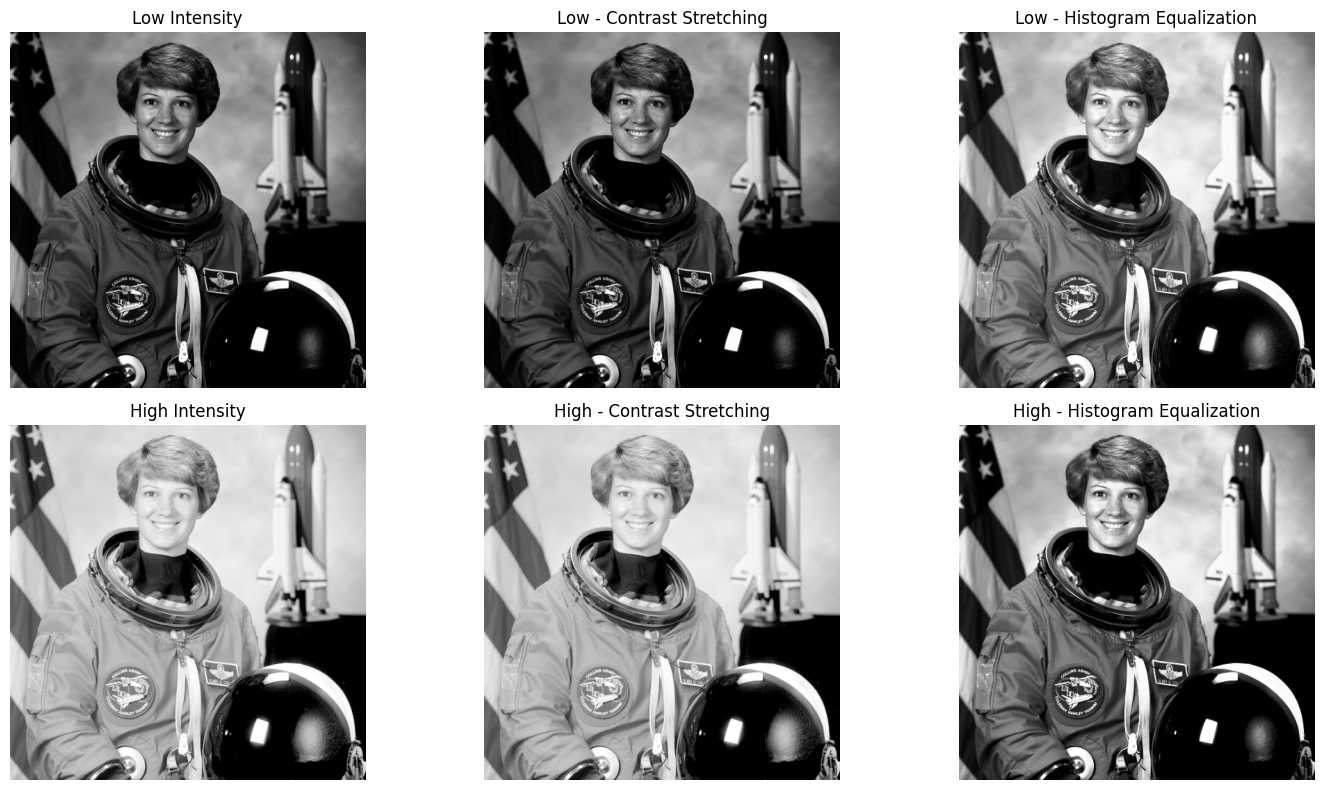

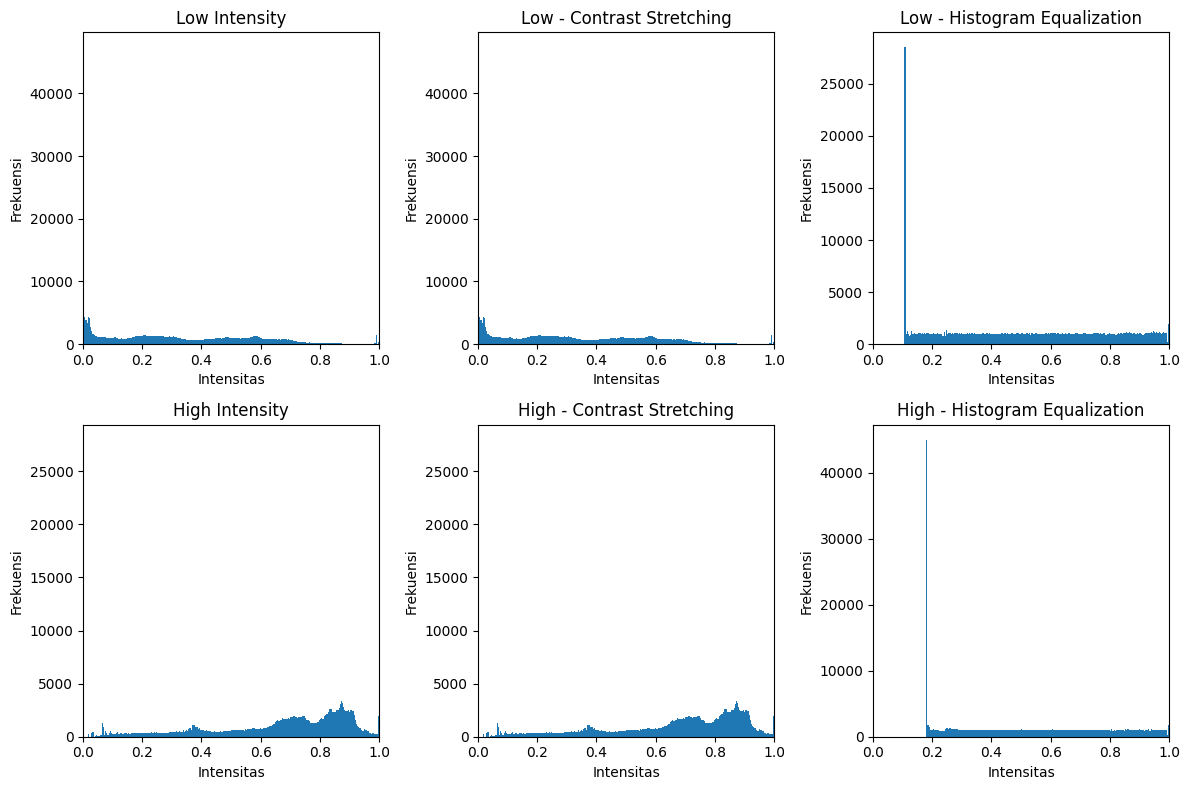

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, exposure, img_as_float

# 1. Ambil gambar astronaut dan ubah ke grayscale
img_color = data.astronaut()
img_gray = color.rgb2gray(img_as_float(img_color))

# 2. Buat versi kontras rendah dan tinggi
high_intesity = exposure.adjust_gamma(img_gray, gamma=0.5, gain=1.0) # gamma < 1 menjadi terang
low_intensity = exposure.adjust_gamma(img_gray, gamma=2.0, gain=1.0) # gamma < 1 menjadi gelap

# 3. Peningkatan kontras untuk gambar low contrast
high_intesity_stretch = exposure.rescale_intensity(high_intesity, in_range='image', out_range=(0, 1))
low_hist_eq = exposure.equalize_hist(high_intesity)

# 4. Peningkatan kontras untuk gambar high contrast
low_intensity_stretch = exposure.rescale_intensity(low_intensity, in_range='image', out_range=(0, 1))
high_hist_eq = exposure.equalize_hist(low_intensity)

# 5. Visualisasi gambar
images = [
    (low_intensity, "Low Intensity"),
    (low_intensity_stretch, "Low - Contrast Stretching"),
    (low_hist_eq, "Low - Histogram Equalization"),
    (high_intesity, "High Intensity"),
    (high_intesity_stretch, "High - Contrast Stretching"),
    (high_hist_eq, "High - Histogram Equalization")
]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for ax, (img, title) in zip(axes.ravel(), images):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

# Visualisasi Histogram chart
hist_data = [
    (low_intensity, "Low Intensity"),
    (low_intensity_stretch, "Low - Contrast Stretching"),
    (low_hist_eq, "Low - Histogram Equalization"),
    (high_intesity, "High Intensity"),
    (high_intesity_stretch, "High - Contrast Stretching"),
    (high_hist_eq, "High - Histogram Equalization")
]

fig2, axes2 = plt.subplots(2, 3, figsize=(12, 8))

for ax, (img, title) in zip(axes2.ravel(), hist_data):
    ax.hist(img.ravel(), bins=256, range=(0, 1))
    ax.set_xlim(0, 1)
    ax.set_title(title)
    ax.set_xlabel("Intensitas")
    ax.set_ylabel("Frekuensi")

plt.tight_layout()
plt.show()



#### hasil analisis
- Dari hasil percobaan, metode histogram equalization terbukti lebih efektif dalam meningkatkan kontras citra dibandingkan contrast stretching dengan in_range='image'.

- Pada citra dengan kontras rendah, histogram equalization mampu menyebarkan intensitas piksel secara merata sehingga gambar tampak lebih jelas dan seimbang. Sementara itu, contrast stretching dengan in_range='image' tidak memberikan perubahan yang signifikan karena hanya meregangkan rentang yang sudah sempit dari citra asli.

- Dengan demikian, histogram equalization lebih unggul untuk memperbaiki gambar yang terlalu gelap atau terlalu terang agar tampil lebih optimal.

## Penugasan 3: Perbandingan Filtering untuk mengatasi noise

1. **Filter Rata-rata (Mean):**
- Menghitung rata-rata piksel sekitar. Namun, jika ada titik noise ekstrem (sangat gelap atau terang), nilai rata-rata jadi ikut terganggu. Akibatnya, noise tidak hilang sepenuhnya dan gambar jadi buram, terutama di tepi objek.

2. **Filter Median:**
- Mengambil nilai tengah dari piksel sekitar. Karena tidak mempedulikan nilai ekstrem, noise bisa dihilangkan lebih efektif tanpa mengaburkan detail penting seperti tepi objek

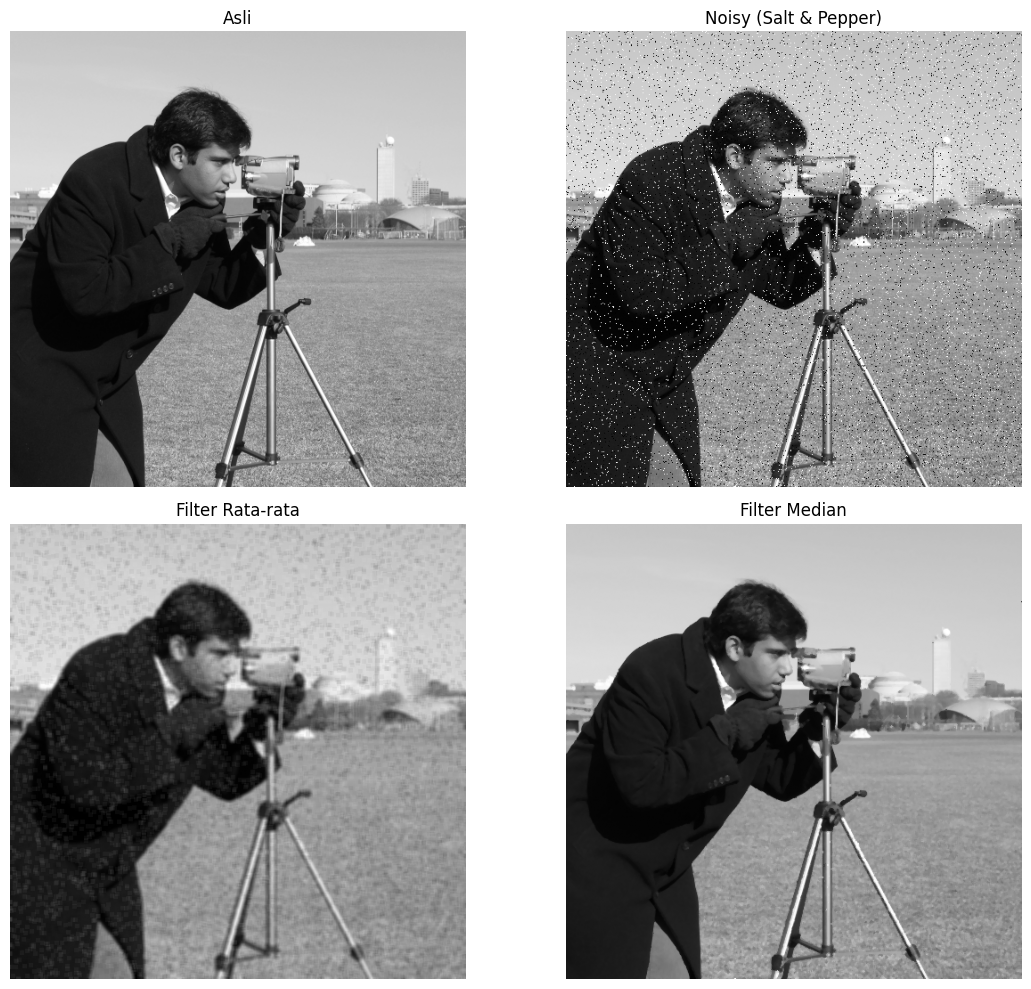

In [49]:
from skimage import data, util, filters
from scipy.ndimage import median_filter, convolve
import numpy as np
import matplotlib.pyplot as plt

# Gunakan citra grayscale
image = data.camera()
noisy_image = util.random_noise(image, mode='s&p')

# Buat kernel rata-rata 
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), dtype=float) / (kernel_size ** 2)

# Terapkan filter rata-rata (mean filter)
mean_filtered = convolve(noisy_image, kernel, mode='reflect')

# Terapkan filter median
median_filtered = median_filter(noisy_image, size=3)

# Plot hasil
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
titles = ['Asli', 'Noisy (Salt & Pepper)', 'Filter Rata-rata', 'Filter Median']
images = [image, noisy_image, mean_filtered, median_filtered]

for ax, img, title in zip(axes.ravel(), images, titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()


#### hasil analisis
Filter median lebih unggul dalam menangani noise impuls seperti salt-and-pepper karena kemampuannya untuk mengabaikan nilai ekstrim (outlier) dan mempertahankan struktur tepi gambar. Sementara itu, filter rata-rata cenderung memperburuk kualitas gambar dengan menyisakan noise dan memburamkan detail gambar.